In [1]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
from scipy import optimize
import seaborn as sns
import math
%matplotlib inline

In [2]:
#直线方程函数
def f_1(x, A, B):
    return A*x + B

#二次曲线方程
def f_2(x, A, B, C):
    return A*x*x + B*x + C

#三次曲线方程
def f_3(x, A, B, C, D):
    return A*x*x*x + B*x*x + C*x + D


def f_gauss(x, A, B, C, sigma):
    return A*np.exp(-(x-B)**2/(2*sigma**2)) + C



In [3]:
def plot_test(x0,y0):

    plt.figure()
    #拟合点
#绘制散点
    #plt.scatter(x0[:], y0[:], 25, "red")

    #直线拟合与绘制
    A1, B1 = optimize.curve_fit(f_1, x0, y0)[0]
    print(A1,B1)
    x1 = np.arange(0, 500, 10)
    y1 = A1*x1 + B1
    plt.plot(x1, y1, "blue")

    #二次曲线拟合与绘制
    A2, B2, C2 = optimize.curve_fit(f_2, x0, y0)[0]
    print(A2,B2,C2)
    x2 = np.arange(0, 500, 10)
    y2 = A2*x2*x2 + B2*x2 + C2
    plt.plot(x2, y2, "green")

    #三次曲线拟合与绘制
    A3, B3, C3, D3= optimize.curve_fit(f_3, x0, y0)[0]
    print(A3,B3,C3,D3)
    x3 = np.arange(0, 500, 10)
    y3 = A3*x3*x3*x3 + B3*x3*x3 + C3*x3 + D3
    plt.plot(x3, y3, "blue")
    #plt.plot(x3, y3, "purple")

    #A4, B4, C4, D4= optimize.curve_fit(f_gauss, x0, y0)[0]
    #print(A4,B4,C4,D4)
    #x4 = np.arange(0, 500, 10)
    #y4 = A4*np.exp(-(x4-B4)**2/(2*D4**2)) + C4
    #plt.plot(x4, y4, "black")

    plt.title("Regression")
    plt.xlabel('PM2.5')
    plt.ylabel('CCN')

    plt.savefig("Regression3_wtj-yrd.png",dpi=600)
    return


In [70]:
def plot_param(x0,y0,title):
    vmax=y0.max()
    #绘制散点
    fig, ax = plt.subplots(figsize=(11.8, 8))
    #plt.rc('text', usetex=False)
    #plt.scatter(x0[:], y0[:], 25, "red")
#直线拟合与绘制
    A1, B1 = optimize.curve_fit(f_1, x0, y0)[0]
    print(A1,B1)
    x1 = np.arange(0, 101, 1)
    y1 = A1*x1 + B1
    plt.plot(x1, y1, "black",label="1-order")
    eq1 = r"y="+ str(round(A1,4))+"*x+" + str(round(B1,4))
    plt.text(40,-vmax/3, eq1, color='black', fontsize=15)
    plt.scatter(x0, y0, marker='^', c="black",label="scatter",alpha=0.2)

    #二次曲线拟合与绘制
    A2, B2, C2 = optimize.curve_fit(f_2, x0, y0)[0]
    print(A2,B2,C2)
    x2 = np.arange(0, 101, 1)
    y2 = A2*x2*x2 + B2*x2 + C2
    plt.plot(x2, y2, "green",label="2-order")
    eq2 = r"y="+str(round(A2,4))+"*x$^{2}$+" + str(round(B2,4))+"*x+" + str(round(C2,4))
    plt.text(40, -vmax/4, eq2,  color='green',fontsize=15)
    #plt.scatter(x, y, marker='^', c="green",label="2-order",alpha=0.2)

    #三次曲线拟合与绘制
    A3, B3, C3, D3= optimize.curve_fit(f_3, x0, y0)[0]
    print(A3,B3,C3,D3)
    x3 = np.arange(0, 101, 1)
    y3 = A3*x3*x3*x3 + B3*x3*x3 + C3*x3 + D3
    plt.plot(x3, y3, "blue",label="3-order")
    eq3 = r"y="+str(round(A2,4))+"*x$^{3}$" + str(round(B3,4))+"*x$^{2}$+" + str(round(C3,4))+"*x+" + str(round(D3,4))
    plt.text(40, -vmax/5, eq3, color='blue',fontsize=15)
    #plt.scatter(x3, y3, marker='^', c="blue",label="3-order",alpha=0.2)
    #plt.plot(x3, y3, "purple")
    '''
    num_to_mass_aer=42097098109277080/1000/1000/1000 #m-3
    A4, B4, C4, D4= optimize.curve_fit(f_gauss, x0, y0)[0]
    print(A4,B4,C4,D4)
    x4 = np.arange(0, 200, 2)
    y4 = A4*np.exp(-(x4-B4)**2/(2*D4**2)) + C4
    plt.plot(x4, y4, "cyan",label="gauss")
    eq4 = r"y="+str(round(A4,4))+'*exp(-(x-('+str(round(B4,4))+')**2/(2*'+str(round(D4,4))+'**2))'+ str(round(C4,4))
    plt.text(80, 4000, eq4, fontsize=15)
    '''
    #plt.plot(x4, y4, "red")
   
    
    plt.title(title+" Regression")
    plt.xlabel('SS/%')
    plt.ylabel('CCN $(cm^{-3})$')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig(title+".png")
    

    return fig,ax

In [16]:
sh = pd.read_csv('NUIST_CCN_ave2.csv')

In [17]:
all=sh.dropna(subset=['Current_SS', 'CCN_Number_Conc'])

In [29]:
x0=all['Current_SS']*100
y0=all['CCN_Number_Conc']

60.838064255962706 2108.9681456348317
-0.39581720643604057 103.91289387216196 1272.0486933754196
0.013278974494038698 -2.5772353711646523 203.63507169500457 176.10301077762318


(<Figure size 849.6x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1bebfe05d68>)

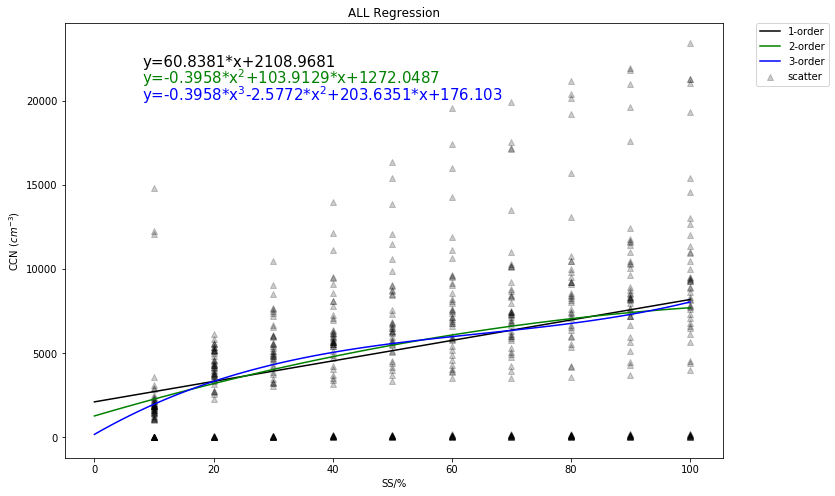

In [53]:
plot_param(x0,y0,"ALL")

In [54]:
all.head()

,labels,Date_BJC,CCN_Number_Conc,Current_SS,Time
0,1,2013-06-03 12:00:00,9278.47,1.0,2019-04-08 12:00:32
1,2,2013-06-03 12:00:00,1096.45,0.1,2019-04-08 12:08:36
2,3,2013-06-03 12:00:00,4427.10,0.2,2019-04-08 12:18:37
3,4,2013-06-03 12:00:00,4550.87,0.3,2019-04-08 12:23:37
4,5,2013-06-03 12:00:00,5400.61,0.4,2019-04-08 12:28:37


In [55]:
df05_13=all[all["Date_BJC"]=="2013-06-05 13:00:00"]

In [58]:
x05_13=df05_13['Current_SS']*100
y05_13=df05_13['CCN_Number_Conc']

In [60]:
x05_13

44     70.0
45     60.0
46     50.0
47     40.0
48     30.0
49     80.0
50     10.0
51    100.0
52     90.0
53     80.0
54     20.0
Name: Current_SS, dtype: float64

In [61]:
y05_13

44    76.99
45    64.80
46    65.28
47    60.08
48    46.18
49    77.75
50     8.21
51    97.81
52    85.55
53    99.15
54    30.00
Name: CCN_Number_Conc, dtype: float64

0.8933556701028602 13.544175257759319
-0.007616732629365908 1.7272701082544129 -3.1262612035941695
0.00015819362633690638 -0.033825021244822846 2.951328246924361 -17.120381642225624


(<Figure size 849.6x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1bec06a6860>)

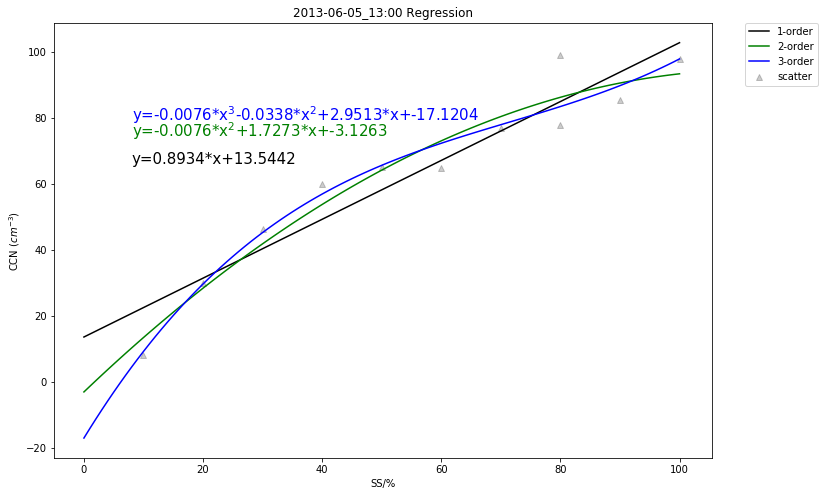

In [68]:
plot_param(x05_13,y05_13,"2013-06-05_13:00")

1.659339393940832 37.90933333341384
-0.025591287881024716 4.474381060613654 -18.391500000042083
0.0004198387701568329 -0.09486468531677184 7.669354118103403 -54.413666666670856


(<Figure size 849.6x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1bec1876438>)

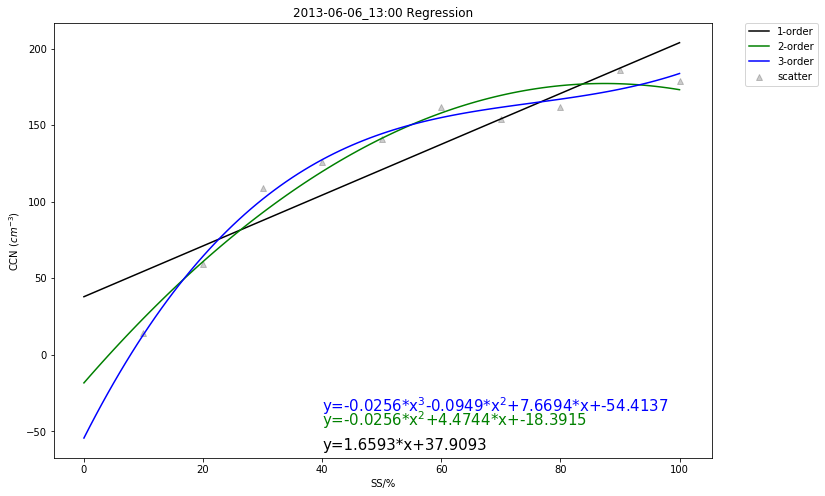

In [71]:
df06_13=all[all["Date_BJC"]=="2013-06-06 13:00:00"]
x06_13=df06_13['Current_SS']*100
y06_13=df06_13['CCN_Number_Conc']
plot_param(x06_13,y06_13,"2013-06-06_13:00")

76.51270810827279 2304.929405410431
-0.6532776727989766 145.1951445185305 1100.7797490660678
0.0049575731991687855 -1.4537307840731026 180.57105000969008 744.9039775067082


(<Figure size 849.6x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1bebfe10cf8>)

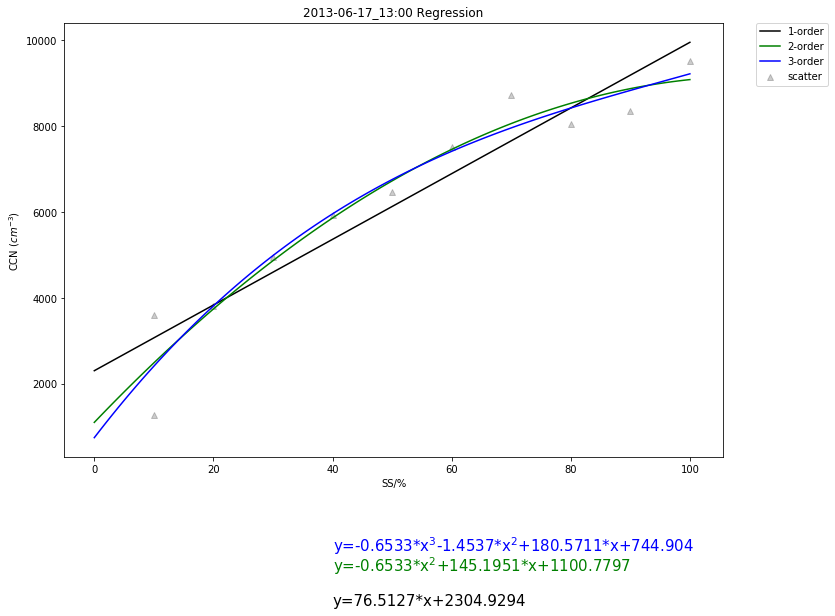

In [73]:
df17_13=all[all["Date_BJC"]=="2013-06-17 13:00:00"]
x17_13=df17_13['Current_SS']*100
y17_13=df17_13['CCN_Number_Conc']
plot_param(x17_13,y17_13,"2013-06-17_13:00")

208.09181151403146 2030.2053738064253
-1.5529700889096896 378.91852215937047 -1386.3288793244865
0.005722138692469403 -2.4971229603805125 422.46399592166154 -1877.28833333739


(<Figure size 849.6x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1beb5c1f8d0>)

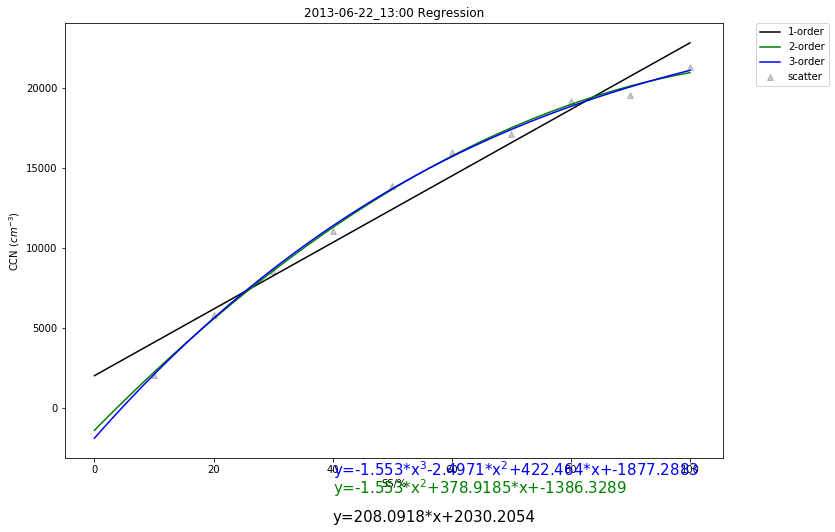

In [74]:
df22_13=all[all["Date_BJC"]=="2013-06-22 13:00:00"]
x22_13=df22_13['Current_SS']*100
y22_13=df22_13['CCN_Number_Conc']
plot_param(x22_13,y22_13,"2013-06-22_13:00")

79.34256969714058 4098.294666675604
-1.8068132714138854 278.0920298433469 123.30545024652902
-7.844405812740263e-05 -1.793869988350798 277.49506876515886 130.03600000037926


(<Figure size 849.6x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1bec0669080>)

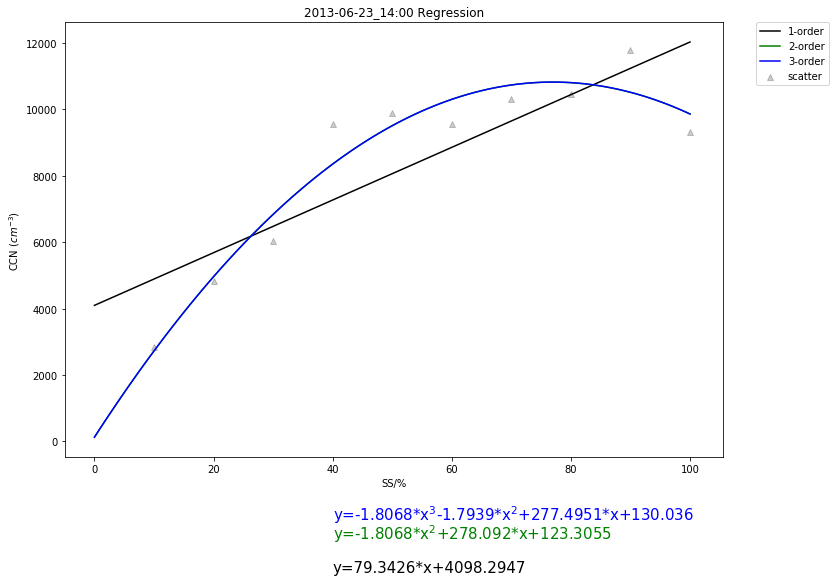

In [78]:
df23_13=all[all["Date_BJC"]=="2013-06-23 14:00:00"]
x23_13=df23_13['Current_SS']*100
y23_13=df23_13['CCN_Number_Conc']
plot_param(x23_13,y23_13,"2013-06-23_14:00")

63.29997914019966 1960.5293684883181
-1.469380936749249 223.50990106051512 -1272.1087275059433
-0.014143583420636707 0.889317043225911 112.72638503889215 -3.5744951565339047


(<Figure size 849.6x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1bec13fcc18>)

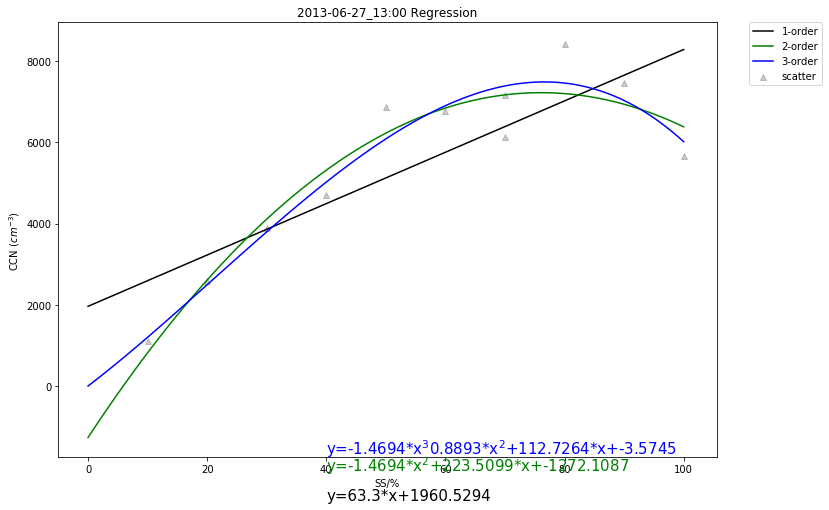

In [75]:
df27_13=all[all["Date_BJC"]=="2013-06-27 13:00:00"]
x27_13=df27_13['Current_SS']*100
y27_13=df27_13['CCN_Number_Conc']
plot_param(x27_13,y27_13,"2013-06-27_13:00")

57.61930537646759 3715.077333341435
-1.3272309021827446 202.33028761421943 795.1693485441901
0.03702342155524807 -7.501555120847515 492.3264430390664 -2525.4514767989112


(<Figure size 849.6x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1bec0c1ba90>)

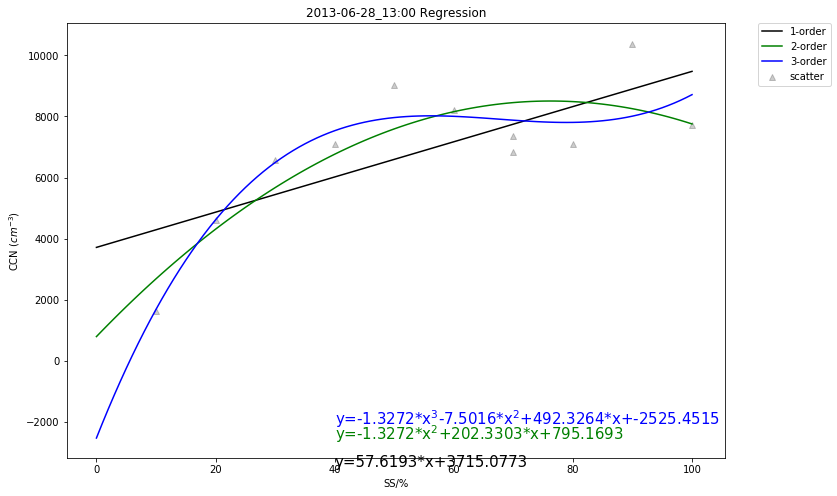

In [79]:
df28_13=all[all["Date_BJC"]=="2013-06-28 13:00:00"]
x28_13=df28_13['Current_SS']*100
y28_13=df28_13['CCN_Number_Conc']
plot_param(x28_13,y28_13,"2013-06-28_13:00")